# Working with Time Series

Dates and Times in Python

In [1]:
from datetime import datetime
datetime(year=2021, month=5, day=21)

datetime.datetime(2021, 5, 21, 0, 0)

In [2]:
from dateutil import parser

date = parser.parse("21st of May 2021")

date


datetime.datetime(2021, 5, 21, 0, 0)

In [3]:
date.strftime('%A')

'Friday'

In [4]:
date.strftime('%w')

'5'

In [5]:
import numpy as np

date = np.array('2021-05-21', dtype=np.datetime64)

date


array('2021-05-21', dtype='datetime64[D]')

In [6]:
date + np.arange(12)

array(['2021-05-21', '2021-05-22', '2021-05-23', '2021-05-24',
       '2021-05-25', '2021-05-26', '2021-05-27', '2021-05-28',
       '2021-05-29', '2021-05-30', '2021-05-31', '2021-06-01'],
      dtype='datetime64[D]')

In [7]:
np.datetime64('2021-05-21')

numpy.datetime64('2021-05-21')

In [8]:
np.datetime64('2021-05-21 12:00')

numpy.datetime64('2021-05-21T12:00')

In [9]:
np.datetime64('2021-05-21 12:00', 'ns')

numpy.datetime64('2021-05-21T12:00:00.000000000')

In [1]:
import pandas as pd
date = pd.to_datetime("21st of May 2021")
date


Timestamp('2021-05-21 00:00:00')

In [2]:
date.strftime('%A')

'Friday'

In [4]:
import numpy as np
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2021-05-21', '2021-05-22', '2021-05-23', '2021-05-24',
               '2021-05-25', '2021-05-26', '2021-05-27', '2021-05-28',
               '2021-05-29', '2021-05-30', '2021-05-31', '2021-06-01'],
              dtype='datetime64[ns]', freq=None)

In [5]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                          '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [6]:
data['2014']

2014-07-04    0
2014-08-04    1
dtype: int64

In [8]:
data['2014-08-04':]

2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [10]:
from datetime import datetime

dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015',
                       '2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [11]:
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]', freq='D')

In [12]:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

In [13]:
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [14]:
pd.date_range('2015-07-03', periods=8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [15]:
pd.date_range('2015-07-03', periods=8, freq='H')

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [16]:
pd.date_range('2015-07-03', periods=8, freq='M')

DatetimeIndex(['2015-07-31', '2015-08-31', '2015-09-30', '2015-10-31',
               '2015-11-30', '2015-12-31', '2016-01-31', '2016-02-29'],
              dtype='datetime64[ns]', freq='M')

In [17]:
pd.timedelta_range(0, periods=9, freq="2H30T")

TimedeltaIndex(['0 days 00:00:00', '0 days 02:30:00', '0 days 05:00:00',
                '0 days 07:30:00', '0 days 10:00:00', '0 days 12:30:00',
                '0 days 15:00:00', '0 days 17:30:00', '0 days 20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

In [20]:
from pandas.tseries.offsets import BDay
pd.date_range('2021-05-21', periods=10, freq=BDay())

DatetimeIndex(['2021-05-21', '2021-05-24', '2021-05-25', '2021-05-26',
               '2021-05-27', '2021-05-28', '2021-05-31', '2021-06-01',
               '2021-06-02', '2021-06-03'],
              dtype='datetime64[ns]', freq='B')

In [59]:
#!pip install pandas-datareader

In [26]:
from pandas_datareader import data

goog = data.DataReader('GOOG', start='2020', end='2021',
                       data_source='yahoo')
goog.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,1368.140015,1341.550049,1341.550049,1367.369995,1406600,1367.369995
2020-01-03,1372.500000,1345.543945,1347.859985,1360.660034,1186400,1360.660034
2020-01-06,1396.500000,1350.000000,1350.000000,1394.209961,1732300,1394.209961
2020-01-07,1402.989990,1390.380005,1397.939941,1393.339966,1502700,1393.339966
2020-01-08,1411.579956,1390.839966,1392.079956,1404.319946,1528000,1404.319946


In [30]:
goog = goog['Close']

In [58]:
#!pip install matplotlib

In [57]:
#!pip install seaborn

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn 
seaborn.set()

<AxesSubplot:xlabel='Date'>

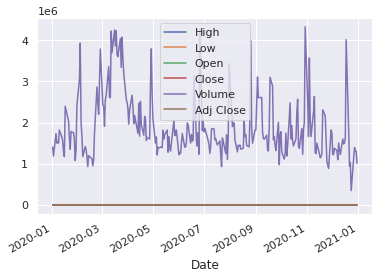

In [28]:
goog.plot()

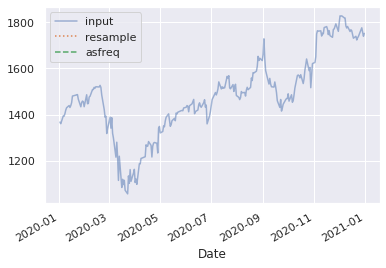

In [31]:
goog.plot(alpha=0.5, style='-')
goog.resample('BA').mean().plot(style=':')
goog.asfreq('BA').plot(style='--');
plt.legend(['input', 'resample', 'asfreq'],
           loc='upper left');

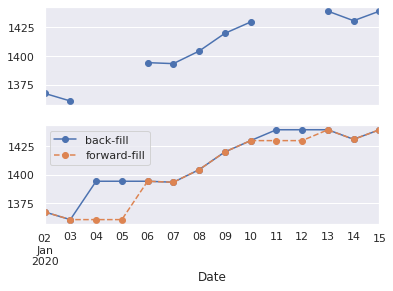

In [32]:
fig, ax = plt.subplots(2, sharex=True)
data = goog.iloc[:10]

data.asfreq('D').plot(ax=ax[0], marker='o')

data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(["back-fill", "forward-fill"]);

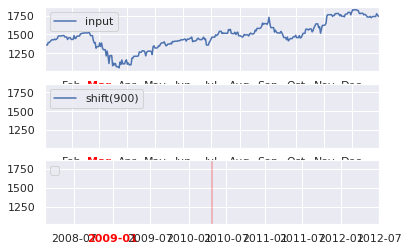

In [35]:
import pandas as pd

fig, ax = plt.subplots(3, sharey=True)

# apply a frequency to the data
goog = goog.asfreq('D', method='pad')

goog.plot(ax=ax[0])
goog.shift(900).plot(ax=ax[1])
#goog.tshift(900).plot(ax=ax[2])

# legends and annotations
local_max = pd.to_datetime('2007-11-05')
offset = pd.Timedelta(900, 'D')

ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[2].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')

ax[1].legend(['shift(900)'], loc=2)
ax[1].get_xticklabels()[2].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')

ax[2].legend(['tshift(900)'], loc=2)
ax[2].get_xticklabels()[1].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red');

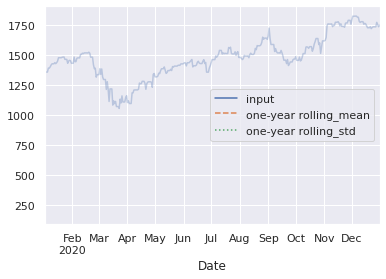

In [36]:
rolling = goog.rolling(365, center=True)

data = pd.DataFrame({'input': goog, 'one-year rolling_mean': rolling.mean(), 'one-year rolling_std': rolling.std()})
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)


In [37]:
#!curl -o FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 4403k    0 4403k    0     0   467k      0 --:--:--  0:00:09 --:--:--  599k


In [43]:
data = pd.read_csv('dataset/FremontBridge.csv', index_col='Date', parse_dates=True)
data.head()


,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


In [44]:
data.columns = ['West', 'East', 'Total']

In [45]:
data.dropna().describe()

,West,East,Total
count,141400.000000,141400.00000,141400.000000
mean,111.169434,50.61628,60.553154
std,141.999671,65.46336,88.279627
min,0.000000,0.00000,0.000000
25%,14.000000,6.00000,7.000000
50%,60.000000,28.00000,30.000000
75%,145.000000,68.00000,74.000000
max,1097.000000,698.00000,850.000000


In [46]:
%matplotlib inline
import seaborn; seaborn.set()

Text(0, 0.5, 'Hourly Bicycle Count')

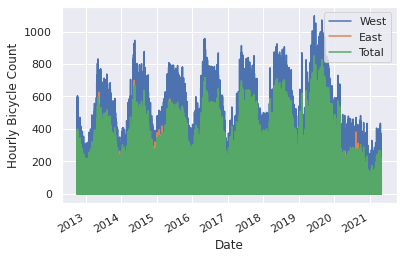

In [47]:
data.plot()
plt.ylabel('Hourly Bicycle Count')

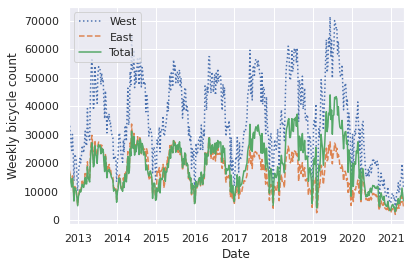

In [48]:
weekly = data.resample('W').sum()
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly bicycle count');

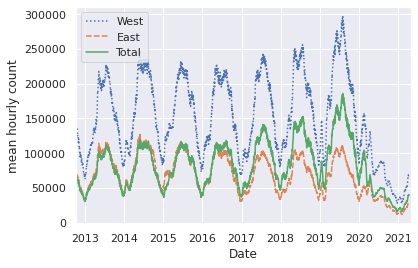

In [49]:
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])
plt.ylabel('mean hourly count');

<AxesSubplot:xlabel='Date'>

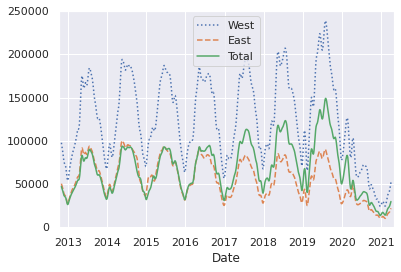

In [50]:
daily.rolling(50, center=True,
              win_type='gaussian').sum(std=10).plot(style=[':', '--', '-'])

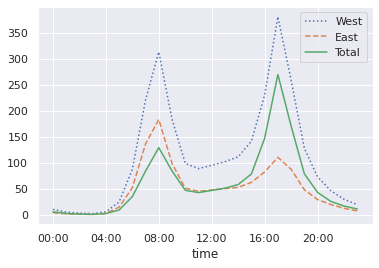

In [52]:
import numpy as np

by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-']);

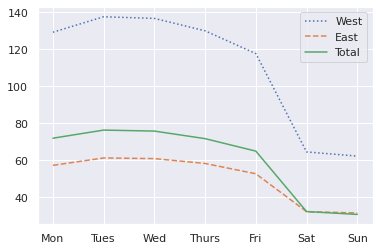

In [53]:
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-']);

In [54]:
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()